# Global Power Plant Database

### Problem Statement:

Description

The Global Power Plant Database is a comprehensive, open source database of power plants around the world. It centralizes power plant data to make it easier to navigate, compare and draw insights for one’s own analysis. The database covers approximately 35,000 power plants from 167 countries and includes thermal plants (e.g. coal, gas, oil, nuclear, biomass, waste, geothermal) and renewables (e.g. hydro, wind, solar). Each power plant is geolocated and entries contain information on plant capacity, generation, ownership, and fuel type. It will be continuously updated as data becomes available.

### Key attributes of the database

The database includes the following indicators:

`country` (text): 3 character country code corresponding to the ISO 3166-1 alpha-3 specification [5]
    
`country_long` (text): longer form of the country designation
    
`name` (text): name or title of the power plant, generally in Romanized form
    
`gppd_idnr` (text): 10 or 12 character identifier for the power plant
    
`capacity_mw` (number): electrical generating capacity in megawatts
    
`latitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)
    
`longitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)
    
`primary_fuel` (text): energy source used in primary electricity generation or export
    
`other_fuel1` (text): energy source used in electricity generation or export
    
`other_fuel2` (text): energy source used in electricity generation or export
    
`other_fuel3` (text): energy source used in electricity generation or export
    
 `commissioning_year` (number): year of plant operation, weighted by unit-capacity when data is available
    
`owner` (text): majority shareholder of the power plant, generally in Romanized form
    
`source` (text): entity reporting the data; could be an organization, report, or document, generally in Romanized form
    
`url` (text): web document corresponding to the `source` field
    
`geolocation_source` (text): attribution for geolocation information
    
`wepp_id` (text): a reference to a unique plant identifier in the widely-used PLATTS-WEPP database.
    
`year_of_capacity_data` (number): year the capacity information was reported
    
`generation_gwh_2013` (number): electricity generation in gigawatt-hours reported for the year 2013
    
`generation_gwh_2014` (number): electricity generation in gigawatt-hours reported for the year 2014
    
`generation_gwh_2015` (number): electricity generation in gigawatt-hours reported for the year 2015
    
`generation_gwh_2016` (number): electricity generation in gigawatt-hours reported for the year 2016
    
`generation_gwh_2017` (number): electricity generation in gigawatt-hours reported for the year 2017
    
`generation_gwh_2018` (number): electricity generation in gigawatt-hours reported for the year 2018
    
`generation_gwh_2019` (number): electricity generation in gigawatt-hours reported for the year 2019
    
`generation_data_source` (text): attribution for the reported generation information
    
`estimated_generation_gwh_2013` (number): estimated electricity generation in gigawatt-hours for the year 2013
    
`estimated_generation_gwh_2014` (number): estimated electricity generation in gigawatt-hours for the year 2014 
    
`estimated_generation_gwh_2015` (number): estimated electricity generation in gigawatt-hours for the year 2015 
    
`estimated_generation_gwh_2016` (number): estimated electricity generation in gigawatt-hours for the year 2016 
    
`estimated_generation_gwh_2017` (number): estimated electricity generation in gigawatt-hours for the year 2017 
    
`estimated_generation_note_2013` (text): label of the model/method used to estimate generation for the year 2013

`estimated_generation_note_2014` (text): label of the model/method used to estimate generation for the year 2014
    
`estimated_generation_note_2015` (text): label of the model/method used to estimate generation for the year 2015
    
`estimated_generation_note_2016` (text): label of the model/method used to estimate generation for the year 2016
    
`estimated_generation_note_2017` (text): label of the model/method used to estimate generation for the year 2017 

In [189]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import os
import scipy as stats
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from scipy.stats import zscore
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.ensemble import GradientBoostingClassifier, BaggingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## Getting the Dataset

In [190]:
df=pd.read_csv('https://raw.githubusercontent.com/wri/global-power-plant-database/master/source_databases_csv/database_IND.csv')
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747000,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,2019.0,NaN,NaN,0.994875,233.596650,865.400000,686.500000,NaN,Central Electricity Authority,NaN
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The dataset has 907 rows and 27 columns

We can see that the dataset is comprised of 27 columns including two target variables capacity_mw and primary_fuel(Fuel_Type) where we need to predict both capacity_mw and Fuel Type.

In [191]:
# Let's define primary_fuel as Fuel_Type to understand the dataset in better way
df.rename(columns={'primary_fuel':'Fuel_Type'},inplace=True)

## Exploratory Data Analysis

In [192]:
#getting the shape of the dataset.
df.shape

(907, 27)

As mentioned above we have 907 rows and 27 column

In [193]:
#getting an overview of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   907 non-null    object 
 1   country_long              907 non-null    object 
 2   name                      907 non-null    object 
 3   gppd_idnr                 907 non-null    object 
 4   capacity_mw               907 non-null    float64
 5   latitude                  861 non-null    float64
 6   longitude                 861 non-null    float64
 7   Fuel_Type                 907 non-null    object 
 8   other_fuel1               198 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        527 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    907 non-null    object 
 14  url       

We can clearly see that we have null values and also object datatype, which we will handle seperately bu imputer and encoding techniques

In [194]:
#checking of the data types of the dataset
df.dtypes

country                      object
country_long                 object
name                         object
gppd_idnr                    object
capacity_mw                 float64
latitude                    float64
longitude                   float64
Fuel_Type                    object
other_fuel1                  object
other_fuel2                  object
other_fuel3                 float64
commissioning_year          float64
owner                        object
source                       object
url                          object
geolocation_source           object
wepp_id                     float64
year_of_capacity_data       float64
generation_gwh_2013         float64
generation_gwh_2014         float64
generation_gwh_2015         float64
generation_gwh_2016         float64
generation_gwh_2017         float64
generation_gwh_2018         float64
generation_gwh_2019         float64
generation_data_source       object
estimated_generation_gwh    float64
dtype: object

The features that needs encoding are country, country_long, name, gppd_idnr,Fuel_Type,other_fuel1,other_fuel2, owner, source, url, geolocation_source,generation_data_source as they are object data type and the ML model needs numeric datatype.

In [195]:
df.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
Fuel_Type                     0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

It can be clearly seen that we have high number of null values and will treat accordigly.

In [196]:
# Checking number of unique values in each column
df.nunique()

country                       1
country_long                  1
name                        907
gppd_idnr                   907
capacity_mw                 361
latitude                    836
longitude                   827
Fuel_Type                     8
other_fuel1                   3
other_fuel2                   1
other_fuel3                   0
commissioning_year           73
owner                       280
source                      191
url                         304
geolocation_source            3
wepp_id                       0
year_of_capacity_data         1
generation_gwh_2013           0
generation_gwh_2014         371
generation_gwh_2015         396
generation_gwh_2016         403
generation_gwh_2017         408
generation_gwh_2018         410
generation_gwh_2019           0
generation_data_source        1
estimated_generation_gwh      0
dtype: int64

Here the columns country, country_long, other_fuel2, year_of_capacity_data and generation_data_source have only one unique value. Also other_fuel3, wepp_id, generation_gwh_2013, generation_gwh_2019,  estimated_generation_gwh have no unique values which means they are filled with only NAN values. Since these columns have same entries thoughout the dataset so we can drop these columns.

So let's do some feature engineering here.

## Feature Selection

In [197]:
# Checking the count of the country
df["country"].value_counts()

IND    907
Name: country, dtype: int64

In [198]:
# Checking the count of the country_long
df["country_long"].value_counts()

India    907
Name: country_long, dtype: int64

We see that only IND is listed in the country hence there is no impact of these two features on prediction

In [199]:
df.drop(columns=["country","country_long"],axis=1,inplace=True)

In [200]:
# Dropping irrelevant columns
df.drop(columns=["other_fuel2", "year_of_capacity_data","generation_data_source", "other_fuel3", "wepp_id","generation_gwh_2013","generation_gwh_2019","estimated_generation_gwh"], axis=1, inplace=True)

In [201]:
# Checking the count of name
df["name"].value_counts()

Satara Wind Farm              1
SINGARENI TPP                 1
NEPANAGAR MILL                1
Patnaik Jamnagar Wind Farm    1
OMKARESHWAR                   1
                             ..
PAMPORE GT                    1
PIPAVAV CCCP                  1
TANDA                         1
LNJP Bahla Basti Wind Farm    1
CHANDERIA SMELTER             1
Name: name, Length: 907, dtype: int64

In [202]:
df["gppd_idnr"].value_counts()

WRI1019943    1
IND0000387    1
WRI1026084    1
IND0000528    1
WRI1019912    1
             ..
WRI1026116    1
IND0000026    1
WRI1026198    1
IND0000055    1
WRI1019930    1
Name: gppd_idnr, Length: 907, dtype: int64

We can see that each power plant has unique name and hence we can drop these features

In [203]:
#Dropping the columns that has no impact on the prediction
df.drop("name",axis=1,inplace=True) 
df.drop("gppd_idnr",axis=1,inplace=True)
df.drop("owner",axis=1,inplace=True)
df.drop("url",axis=1,inplace=True)

In [204]:
df.shape

(907, 13)

Now we see 907 rows 13 columns

In [205]:
# Checking null values again after feature selection
df.isnull().sum()

capacity_mw              0
latitude                46
longitude               46
Fuel_Type                0
other_fuel1            709
commissioning_year     380
source                   0
geolocation_source      19
generation_gwh_2014    509
generation_gwh_2015    485
generation_gwh_2016    473
generation_gwh_2017    467
generation_gwh_2018    459
dtype: int64

<AxesSubplot:>

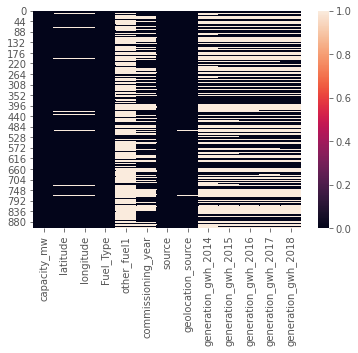

In [206]:
# Let's visualize the null values clearly
sns.heatmap(df.isnull())

White lines in heat map shows missing values in dataset

In [207]:
#Checking the skewness of the dataset
df.skew().sort_values()

commissioning_year    -1.067949
latitude              -0.145866
longitude              1.112646
capacity_mw            3.123576
generation_gwh_2014    3.342707
generation_gwh_2018    3.476298
generation_gwh_2016    3.512370
generation_gwh_2017    3.566070
generation_gwh_2015    3.665904
dtype: float64

## Treating null values using imputation techniques.

Checking the mean and mode values of the features having null values, so that we can fill the null values

In [208]:
#checking the mean of latitude
df['latitude'].mean()

21.19791811846691

In [209]:
#checking the mode of other_fuel1 
df["other_fuel1"].mode()

0    Oil
dtype: object

In [210]:
#checking the mode of geolocation_source columns
df["geolocation_source"].mode()

0    WRI
dtype: object

In [211]:
#Filling the null values

df["latitude"] = df["latitude"].fillna(df["latitude"].mean())
df["other_fuel1"] = df["other_fuel1"].fillna(df["other_fuel1"].mode()[0])
df["geolocation_source"] = df["geolocation_source"].fillna(df["geolocation_source"].mode()[0])
df["longitude"] = df["longitude"].fillna(df["longitude"].median())
df["commissioning_year"] = df["commissioning_year"].fillna(df["commissioning_year"].median())
df["generation_gwh_2014"] = df["generation_gwh_2014"].fillna(df["generation_gwh_2014"].median())
df["generation_gwh_2015"] = df["generation_gwh_2015"].fillna(df["generation_gwh_2015"].median())
df["generation_gwh_2016"] = df["generation_gwh_2016"].fillna(df["generation_gwh_2016"].median())
df["generation_gwh_2017"] = df["generation_gwh_2017"].fillna(df["generation_gwh_2017"].median())
df["generation_gwh_2018"] = df["generation_gwh_2017"].fillna(df["generation_gwh_2018"].median())

In [212]:
df.isnull().sum()

capacity_mw            0
latitude               0
longitude              0
Fuel_Type              0
other_fuel1            0
commissioning_year     0
source                 0
geolocation_source     0
generation_gwh_2014    0
generation_gwh_2015    0
generation_gwh_2016    0
generation_gwh_2017    0
generation_gwh_2018    0
dtype: int64

We have treated the null values now and the data now shows no null values

<AxesSubplot:>

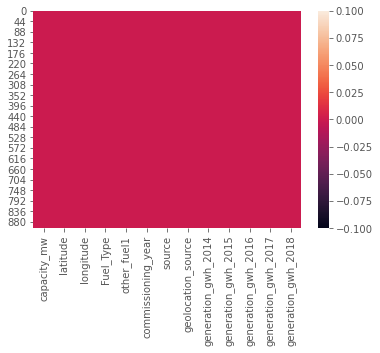

In [213]:
# Let's visualize the null values clearly

sns.heatmap(df.isnull())

There are no null values

In [214]:
df.isnull().sum()

capacity_mw            0
latitude               0
longitude              0
Fuel_Type              0
other_fuel1            0
commissioning_year     0
source                 0
geolocation_source     0
generation_gwh_2014    0
generation_gwh_2015    0
generation_gwh_2016    0
generation_gwh_2017    0
generation_gwh_2018    0
dtype: int64

In [215]:
#Getting the columns in the dataset
df.columns

Index(['capacity_mw', 'latitude', 'longitude', 'Fuel_Type', 'other_fuel1',
       'commissioning_year', 'source', 'geolocation_source',
       'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016',
       'generation_gwh_2017', 'generation_gwh_2018'],
      dtype='object')

In [216]:
# Checking the list of counts of capacity_mw
df['capacity_mw'].value_counts()

5.0       39
10.0      22
15.0      20
600.0     20
1200.0    19
          ..
192.0      1
27.3       1
26.4       1
68.8       1
19.7       1
Name: capacity_mw, Length: 361, dtype: int64

In [217]:
# Checking the list of counts of primary_fuel
df['Fuel_Type'].value_counts()

Coal       258
Hydro      251
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         20
Nuclear      9
Name: Fuel_Type, dtype: int64

In [218]:
# Checking the uniqueness of primary_fuel
df["Fuel_Type"].unique()

array(['Solar', 'Coal', 'Wind', 'Gas', 'Hydro', 'Biomass', 'Oil',
       'Nuclear'], dtype=object)

## Feature Extraction

In [219]:
# Checking the list of counts of commissioning_year
df['commissioning_year'].value_counts()

2001.0    395
2015.0     28
2013.0     25
2012.0     23
2016.0     19
         ... 
1958.0      1
1949.0      1
1954.0      1
1956.0      1
1927.0      1
Name: commissioning_year, Length: 73, dtype: int64

In [220]:
# Let's extract power plant age from commissioning year by subtracting it from the year 2018
df["Power_plant_age"] = 2018 - df["commissioning_year"]
df.drop(columns=["commissioning_year"], inplace = True)

Here I have extracted Power plant age from commissioning year and dropped commissioning year columns. From Power plant age we can get to know how old are the power plants.

In [221]:
df.head()

,capacity_mw,latitude,longitude,Fuel_Type,other_fuel1,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Power_plant_age
0,2.5,28.1839,73.2407,Solar,Oil,National Renewable Energy Laboratory,National Renewable Energy Laboratory,801.123775,711.181225,737.205450,817.977250,817.977250,7.0
1,98.0,24.7663,74.6090,Coal,Oil,Ultratech Cement ltd,WRI,801.123775,711.181225,737.205450,817.977250,817.977250,17.0
2,39.2,21.9038,69.3732,Wind,Oil,CDM,WRI,801.123775,711.181225,737.205450,817.977250,817.977250,17.0
3,135.0,23.8712,91.3602,Gas,Oil,Central Electricity Authority,WRI,617.789264,843.747000,886.004428,663.774500,663.774500,14.0
4,1800.0,21.9603,82.4091,Coal,Oil,Central Electricity Authority,WRI,3035.550000,5916.370000,6243.000000,5385.579736,5385.579736,3.0


## Statistical Description of the DataSet

In [222]:
df.describe()

,capacity_mw,latitude,longitude,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Power_plant_age
count,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000
mean,326.223755,21.197918,77.427103,1516.689956,1510.071296,1565.361383,1657.121797,1657.121797,19.271224
std,590.085456,6.079148,4.815073,2785.604307,2984.994556,3005.087210,3046.862910,3046.862910,13.158621
min,0.000000,8.168900,68.644700,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.725000,17.072000,74.388900,801.123775,711.181225,737.205450,817.977250,817.977250,15.000000
50%,59.200000,21.281800,76.719500,801.123775,711.181225,737.205450,817.977250,817.977250,17.000000
75%,385.250000,25.176450,79.206100,801.123775,711.181225,737.205450,817.977250,817.977250,20.000000
max,4760.000000,34.649000,95.408000,28127.000000,30539.000000,30015.000000,35116.000000,35116.000000,91.000000


Here we can see the statistical analysis of the dataset (numerical only)

We can observe that the count of the columns are same, which means the dataset is balanced. The minimum capacity of the power plant is zero and maximum in 4760 and there is huge difference in mean and standard deviation.From the difference between maximum and 75% percentile we can infer that there are huge outliers present in most of the columns, will remove them using appropriate methods before building our model.

In [223]:
#checking the categorical columns
cat_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        cat_col.append(i)
print(cat_col)

['Fuel_Type', 'other_fuel1', 'source', 'geolocation_source']


In [224]:
#checking the numeric columns for visualization
num_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]!='object':
        num_col.append(i)
print(num_col)        

['capacity_mw', 'latitude', 'longitude', 'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018', 'Power_plant_age']


## Data Visualization

### Univariate Analysis

### Categorical column visualization

Coal       258
Hydro      251
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         20
Nuclear      9
Name: Fuel_Type, dtype: int64


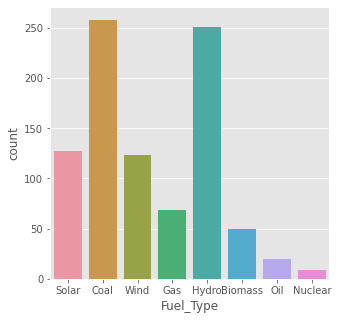

In [225]:
print(df['Fuel_Type'].value_counts())   #visualizing the fuel types in Fuel_Type
plt.figure(figsize=(5,5))
sns.countplot(df['Fuel_Type'])
plt.show()

Here we can see that the 'Coal' energy source is used the highest in the generation of electricity. Then the next energy source used is the 'HydroBiomass' and followed by the other energy sources.

Oil             904
Gas               2
Cogeneration      1
Name: other_fuel1, dtype: int64


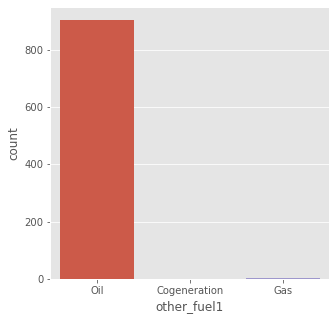

In [226]:
#checking the count of fuel1
print(df['other_fuel1'].value_counts())
plt.figure(figsize=(5,5))
sns.countplot(df['other_fuel1'])
plt.show()

It can be observed that 'other_fuel1' type has 3 unique types namely: 'Oil', 'Cogeneration other fuel', 'Gas'. And it is clearly seen that oil is the max used fuel type.

WRI                                     784
Industry About                          119
National Renewable Energy Laboratory      4
Name: geolocation_source, dtype: int64


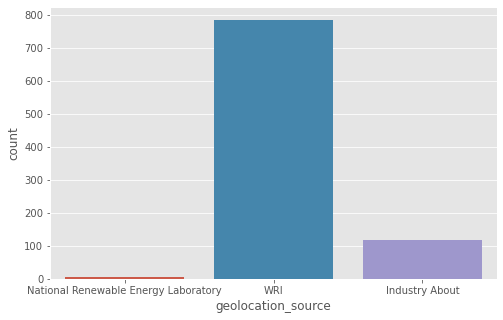

In [227]:
# Visualizing the counts of owner
print(df["geolocation_source"].value_counts())
labels='WRI','Industry About','National Renewable Energy Laboratory'
plt.figure(figsize=(8,5))
sns.countplot(df['geolocation_source'])
plt.show()

Here it can be seen that the count of WRI is the max, which means that the max information is shared by this source.

5.0       39
10.0      22
15.0      20
600.0     20
1200.0    19
          ..
192.0      1
27.3       1
26.4       1
68.8       1
19.7       1
Name: capacity_mw, Length: 361, dtype: int64


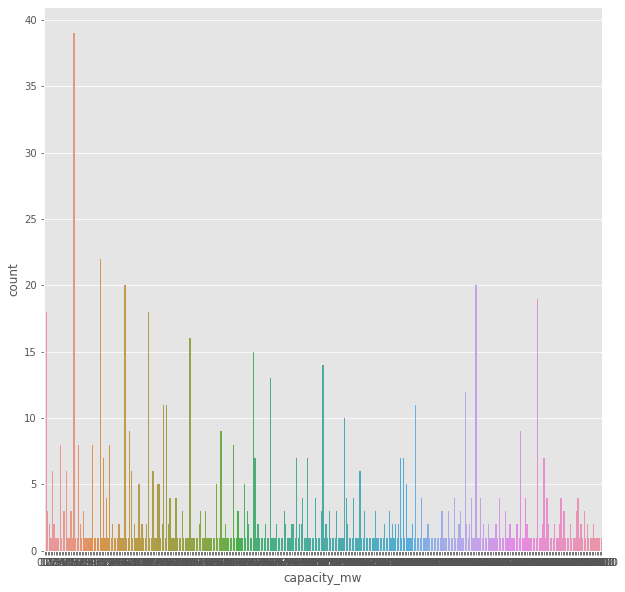

In [228]:
print(df['capacity_mw'].value_counts())   #visualizing the capacity_mw
plt.figure(figsize=(10,10))
sns.countplot(df['capacity_mw'])
plt.show()

### Checking the Distribution of the Dataset, if it is normal

### Numerical Column

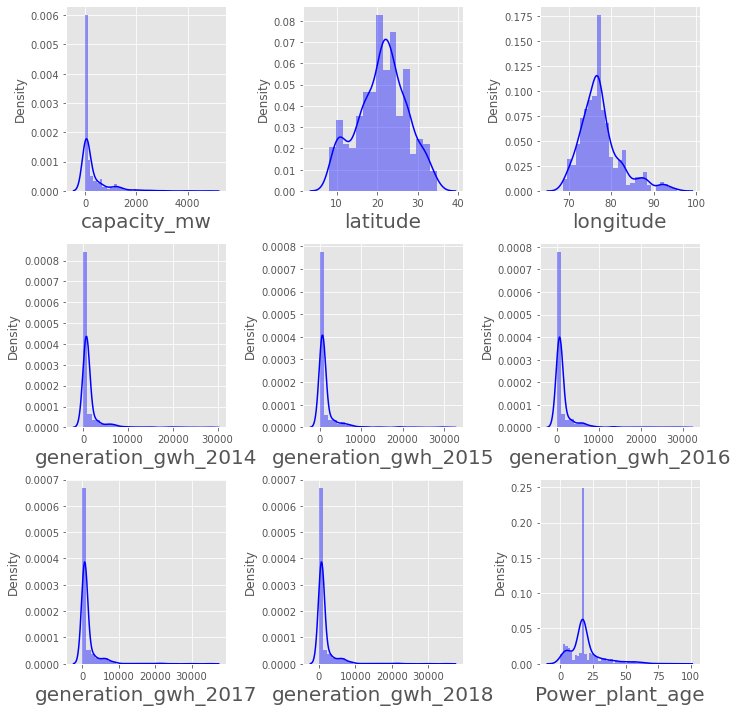

In [229]:
# Checking how the data has been distriubted in each column

plt.figure(figsize=(10,10),facecolor='white')
plotnumber=1
for column in num_col:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(df[column],color="b")
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

Here in the plots we can see that the data is not normally distributed. Outliers and skewness is present, which needs to be treated,

## Bivariate Analysis

### Corealtion between features and targer 'Capacity_mw'

<AxesSubplot:title={'center':'Comparision between geolocation_source and capacity_mw'}, xlabel='geolocation_source', ylabel='capacity_mw'>

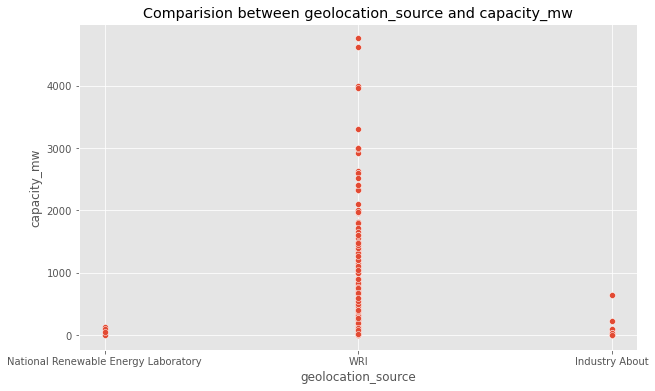

In [230]:
#Checking the relation between target capacity_mw and variable geolocation source
plt.figure(figsize=[10,6])
plt.style.use('ggplot')
plt.title('Comparision between geolocation_source and capacity_mw')
sns.scatterplot(df['geolocation_source'],df["capacity_mw"])

Here also we can see that WRI plats a major role

<AxesSubplot:title={'center':'Comparision between Power_plant_age and capacity_mw'}, xlabel='Power_plant_age', ylabel='capacity_mw'>

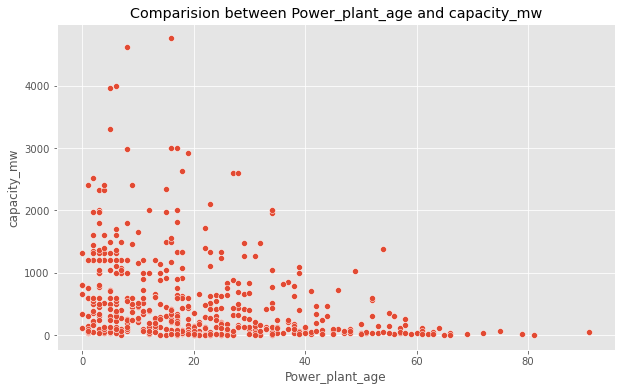

In [231]:
#Checking the relation between power plant age and capacity_mw
plt.figure(figsize=[10,6])
plt.style.use('ggplot')
plt.title('Comparision between Power_plant_age and capacity_mw')
sns.scatterplot(df['Power_plant_age'],df["capacity_mw"])

Here we can see a negative corelation

<AxesSubplot:title={'center':'Comparision between latitude and capacity_mw'}, xlabel='latitude', ylabel='capacity_mw'>

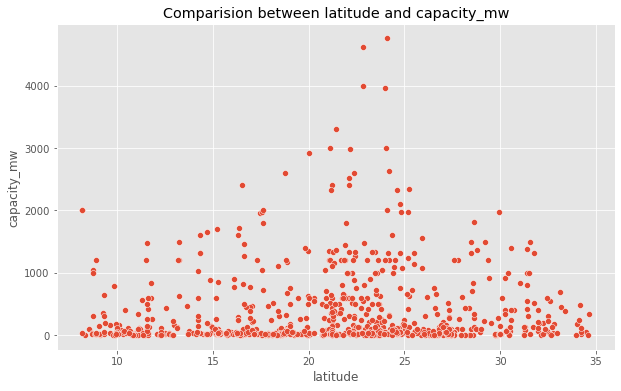

In [232]:
# Checking the relation between feature latitude and targer capacity_mw
plt.figure(figsize=[10,6])
plt.style.use('ggplot')
plt.title('Comparision between latitude and capacity_mw')
sns.scatterplot(df['latitude'],df["capacity_mw"])

Here this feature do not show any linear relationship

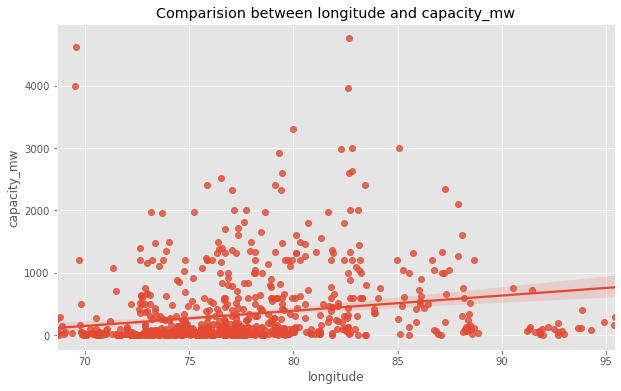

In [233]:
# Checking the relationship between target longitude and capacity_mw
plt.figure(figsize=[10,6])
plt.style.use('ggplot')
plt.title('Comparision between longitude and capacity_mw')
sns.regplot(df['longitude'],df["capacity_mw"]);

This feature also do not show any linear relationship

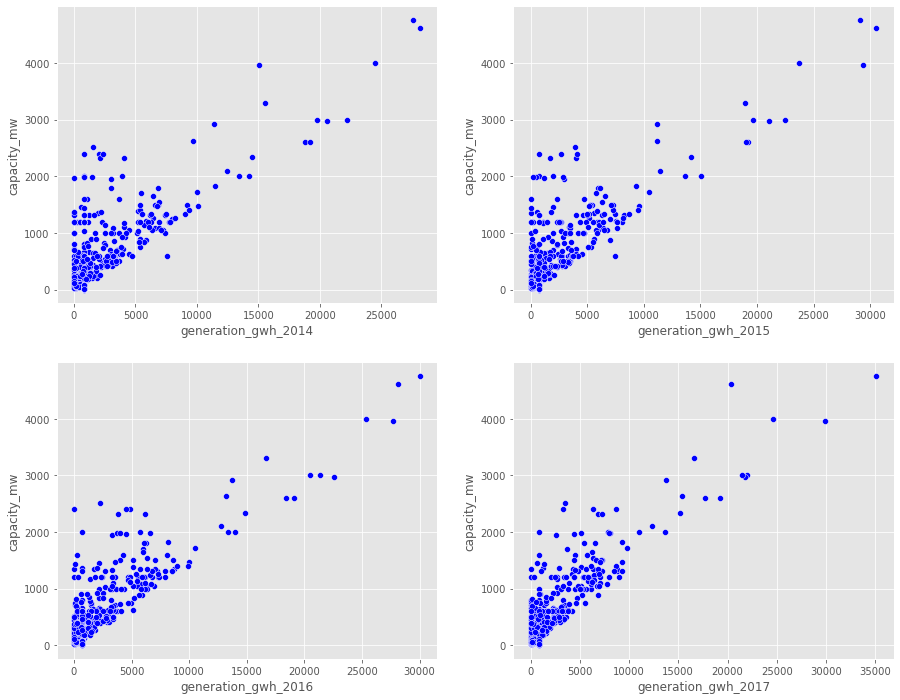

In [247]:
fig,axes=plt.subplots(2,2,figsize=(15,12))

#Checking the relation between feature generation_gwh_2014 and targer capacity_mw
sns.scatterplot(x='generation_gwh_2014',y='capacity_mw',ax=axes[0,0],data=df,color="b")

#Checking the relation between feature generation_gwh_2015 and targer capacity_mw
sns.scatterplot(x='generation_gwh_2015',y='capacity_mw',ax=axes[0,1],data=df,color="b")

#Checking the relation between feature generation_gwh_2016 and targer capacity_mw
sns.scatterplot(x='generation_gwh_2016',y='capacity_mw',ax=axes[1,0],data=df,color="b")

#Checking the relation between feature generation_gwh_2017 and targer capacity_mw
sns.scatterplot(x='generation_gwh_2017',y='capacity_mw',ax=axes[1,1],data=df,color="b")
plt.show()

This features shows a positive corelation. Here the electricity generation reported for the years has capacity above 1000 mw also as the generation growth increases, the capacity of plant is also increasing moderately.

# Corealtion between features and target 'Fuel_Types'

<AxesSubplot:title={'center':'Comparision between Power_plant_age and Fuel_Type'}, xlabel='Power_plant_age', ylabel='Fuel_Type'>

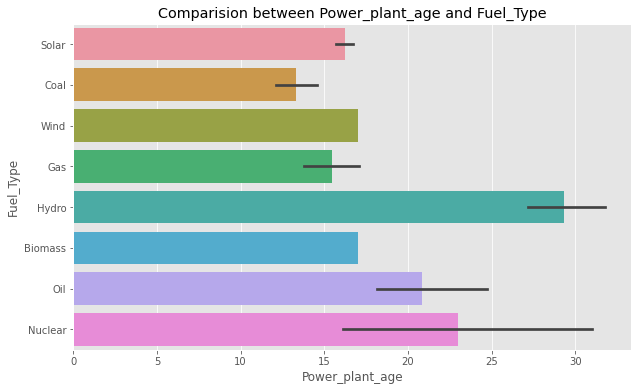

In [248]:
#Checking the relation between target fuel_type and variable Power_plant_age
plt.figure(figsize=[10,6])
plt.title('Comparision between Power_plant_age and Fuel_Type')
sns.barplot(df['Power_plant_age'],df["Fuel_Type"])

Here we can see that older power plants uses Hydro as energy source, followed by Nuclear and then oil. The newer power plants are using more of Coal, Solar and Gas

<AxesSubplot:title={'center':'Comparision between latitude and Fuel_Type'}, xlabel='latitude', ylabel='Fuel_Type'>

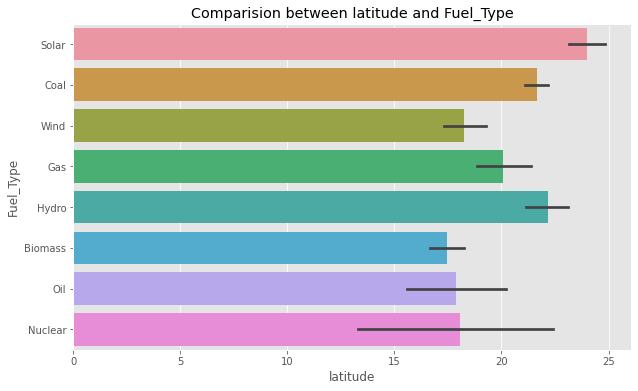

In [249]:
# Checking the relation between feature latitude and targer Fuel_Type
plt.figure(figsize=[10,6])
plt.title('Comparision between latitude and Fuel_Type')
sns.barplot(df['latitude'],df["Fuel_Type"])

Solar has the highest latitude

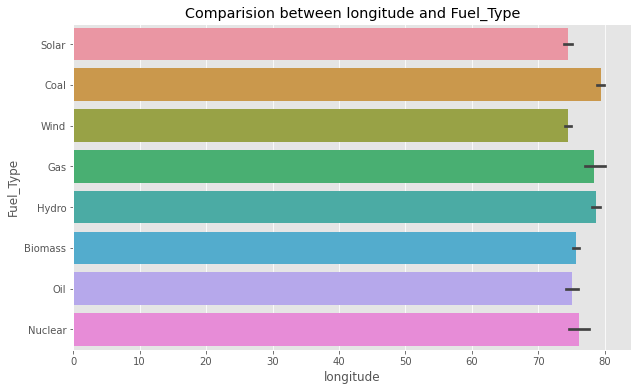

In [250]:
# Checking the relationship between target longitude and Fuel_Type
plt.figure(figsize=[10,6])
plt.title('Comparision between longitude and Fuel_Type')
sns.barplot(df['longitude'],df["Fuel_Type"]);

Here Coal shows the highest longitude

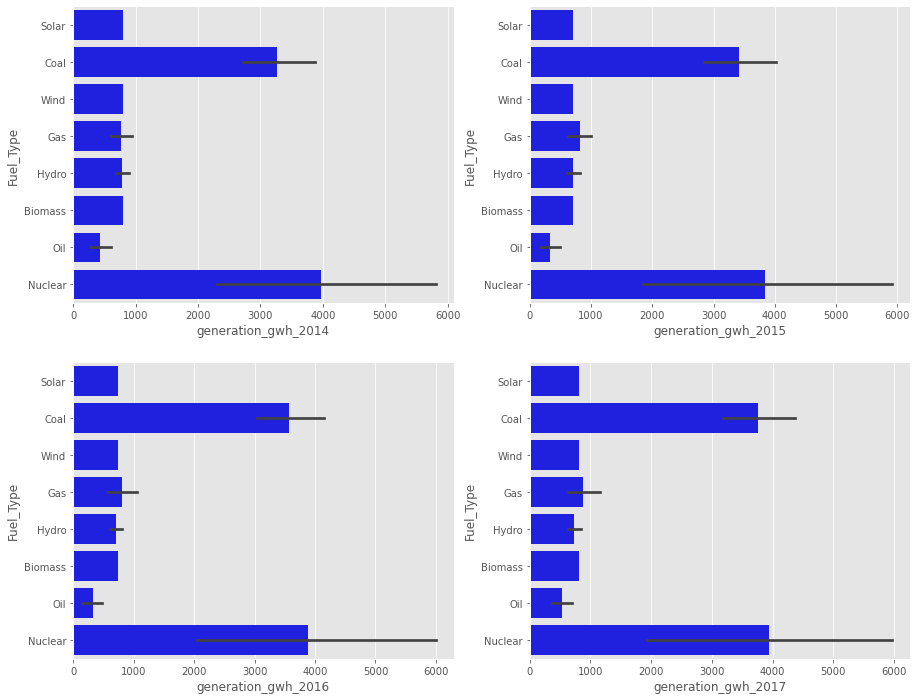

In [251]:
fig,axes=plt.subplots(2,2,figsize=(15,12))

#Checking the relation between feature generation_gwh_2014 and targer Fuel_Type
sns.barplot(x='generation_gwh_2014',y='Fuel_Type',ax=axes[0,0],data=df,color="b")

#Checking the relation between feature generation_gwh_2015 and targer Fuel_Type
sns.barplot(x='generation_gwh_2015',y='Fuel_Type',ax=axes[0,1],data=df,color="b")

#Checking the relation between feature generation_gwh_2016 and targer Fuel_Type
sns.barplot(x='generation_gwh_2016',y='Fuel_Type',ax=axes[1,0],data=df,color="b")

#Checking the relation between feature generation_gwh_2017 and targer Fuel_Type
sns.barplot(x='generation_gwh_2017',y='Fuel_Type',ax=axes[1,1],data=df,color="b")
plt.show()

Here we can see that the most used energy source in all the years is neuclear followed by coal

### Checking the relationship between both the targets

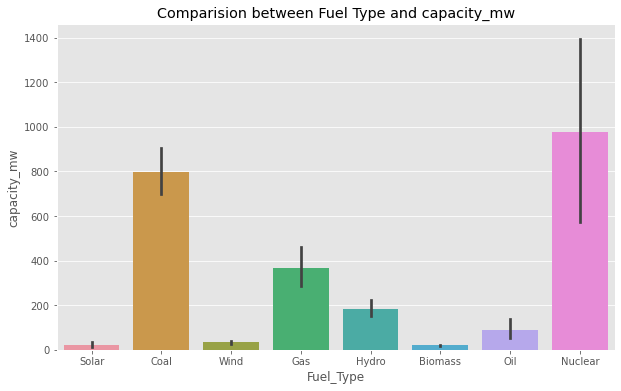

In [252]:
plt.figure(figsize = (10,6))
plt.title("Comparision between Fuel Type and capacity_mw")
sns.barplot(x = "Fuel_Type", y = "capacity_mw", data = df)
plt.show()

Here also it shows that energy source Nuclear has shown the major contribution

## Label Encoding

In [253]:
categorical_col = ['Fuel_Type', 'other_fuel1', 'source', 'geolocation_source']

In [254]:
LE=LabelEncoder()
df[categorical_col]= df[categorical_col].apply(LE.fit_transform)

In [255]:
df[categorical_col]

,Fuel_Type,other_fuel1,source,geolocation_source
0,6,2,109,1
1,1,2,174,2
2,7,2,21,2
3,2,2,22,2
4,1,2,22,2
...,...,...,...,...
902,1,2,22,2
903,6,2,77,0
904,7,2,21,2
905,1,2,59,2


Now we have encoded the categorical columns

### Identifying the outliers

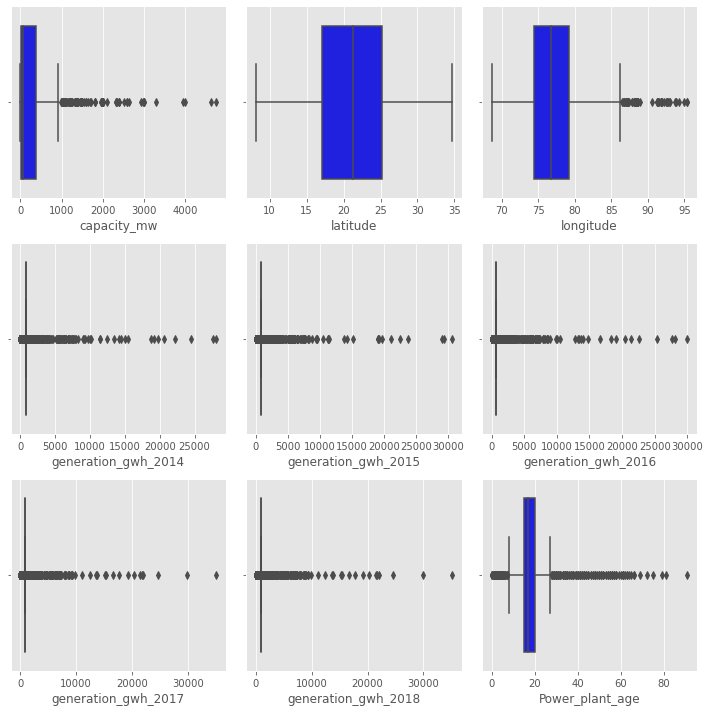

In [256]:
plt.figure(figsize=(10,10),facecolor='white')
plotnumber=1
for column in num_col:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.boxplot(df[column],color="blue")
        plt.xlabel(column,fontsize=12)
    plotnumber+=1
plt.tight_layout()

In the boxplot we can notice the outliers present in all the columns except latitude. Even target column has outliers but no need to remove it. Let's remove outliers using Zscore method

In [257]:
df.columns

Index(['capacity_mw', 'latitude', 'longitude', 'Fuel_Type', 'other_fuel1',
       'source', 'geolocation_source', 'generation_gwh_2014',
       'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017',
       'generation_gwh_2018', 'Power_plant_age'],
      dtype='object')

In [261]:
# Features containing outliers
features = df[['longitude', 'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017','generation_gwh_2018','Power_plant_age']]

In [262]:
z=np.abs(zscore(features))

z

array([[0.86991672, 0.25702178, 0.26778301, ..., 0.27556459, 0.27556459,
        0.93307603],
       [0.58558978, 0.25702178, 0.26778301, ..., 0.27556459, 0.27556459,
        0.17269871],
       [1.67356683, 0.25702178, 0.26778301, ..., 0.27556459, 0.27556459,
        0.17269871],
       ...,
       [0.38359152, 0.25702178, 0.26778301, ..., 0.27556459, 0.27556459,
        0.17269871],
       [0.76456427, 0.25702178, 0.26778301, ..., 0.27556459, 0.27556459,
        0.17269871],
       [0.0103269 , 0.25702178, 0.26778301, ..., 0.27556459, 0.27556459,
        0.17269871]])

In [263]:
# Creating new dataframe
new_df = df[(z<3).all(axis=1)] 
new_df

,capacity_mw,latitude,longitude,Fuel_Type,other_fuel1,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Power_plant_age
0,2.5,28.1839,73.2407,6,2,109,1,801.123775,711.181225,737.205450,817.977250,817.977250,7.0
1,98.0,24.7663,74.6090,1,2,174,2,801.123775,711.181225,737.205450,817.977250,817.977250,17.0
2,39.2,21.9038,69.3732,7,2,21,2,801.123775,711.181225,737.205450,817.977250,817.977250,17.0
3,135.0,23.8712,91.3602,2,2,22,2,617.789264,843.747000,886.004428,663.774500,663.774500,14.0
4,1800.0,21.9603,82.4091,1,2,22,2,3035.550000,5916.370000,6243.000000,5385.579736,5385.579736,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,1600.0,16.2949,77.3568,1,2,22,2,801.123775,0.994875,233.596650,865.400000,865.400000,2.0
903,3.0,12.8932,78.1654,6,2,77,0,801.123775,711.181225,737.205450,817.977250,817.977250,17.0
904,25.5,15.2758,75.5811,7,2,21,2,801.123775,711.181225,737.205450,817.977250,817.977250,17.0
905,80.0,24.3500,73.7477,1,2,59,2,801.123775,711.181225,737.205450,817.977250,817.977250,17.0


In [264]:
df.shape

(907, 13)

In [265]:
new_df.shape

(852, 13)

New dataframe has 852 rows and 13 columns

## Correlation between the target variable and features using HEAT map

In [279]:
cor = new_df.corr()
cor

,capacity_mw,latitude,longitude,Fuel_Type,other_fuel1,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Power_plant_age
capacity_mw,1.000000,0.050048,0.257383,-0.398217,-0.001441,-0.275072,0.233871,0.615801,0.674601,0.748505,0.792419,0.792419,-0.245110
latitude,0.050048,1.000000,-0.014135,-0.002573,0.037050,0.069413,-0.203314,0.081653,0.071346,0.057236,0.070829,0.070829,-0.096958
longitude,0.257383,-0.014135,1.000000,-0.383326,0.029222,-0.235970,0.263930,0.119811,0.154708,0.196012,0.197348,0.197348,-0.080772
Fuel_Type,-0.398217,-0.002573,-0.383326,1.000000,0.006395,0.039112,-0.478753,-0.250588,-0.276529,-0.287871,-0.290991,-0.290991,0.075706
other_fuel1,-0.001441,0.037050,0.029222,0.006395,1.000000,0.028433,-0.022798,-0.000491,0.006114,0.015561,0.011987,0.011987,-0.058132
source,-0.275072,0.069413,-0.235970,0.039112,0.028433,1.000000,-0.498012,-0.141798,-0.156488,-0.159255,-0.157090,-0.157090,-0.074509
geolocation_source,0.233871,-0.203314,0.263930,-0.478753,-0.022798,-0.498012,1.000000,0.113695,0.125473,0.127691,0.125956,0.125956,0.050944
generation_gwh_2014,0.615801,0.081653,0.119811,-0.250588,-0.000491,-0.141798,0.113695,1.000000,0.912174,0.800971,0.743005,0.743005,-0.060584
generation_gwh_2015,0.674601,0.071346,0.154708,-0.276529,0.006114,-0.156488,0.125473,0.912174,1.000000,0.907191,0.825737,0.825737,-0.130635
generation_gwh_2016,0.748505,0.057236,0.196012,-0.287871,0.015561,-0.159255,0.127691,0.800971,0.907191,1.000000,0.931186,0.931186,-0.201005


(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5]),
 [Text(0, 0.5, 'capacity_mw'),
  Text(0, 1.5, 'latitude'),
  Text(0, 2.5, 'longitude'),
  Text(0, 3.5, 'Fuel_Type'),
  Text(0, 4.5, 'other_fuel1'),
  Text(0, 5.5, 'source'),
  Text(0, 6.5, 'geolocation_source'),
  Text(0, 7.5, 'generation_gwh_2014'),
  Text(0, 8.5, 'generation_gwh_2015'),
  Text(0, 9.5, 'generation_gwh_2016'),
  Text(0, 10.5, 'generation_gwh_2017'),
  Text(0, 11.5, 'generation_gwh_2018'),
  Text(0, 12.5, 'Power_plant_age')])

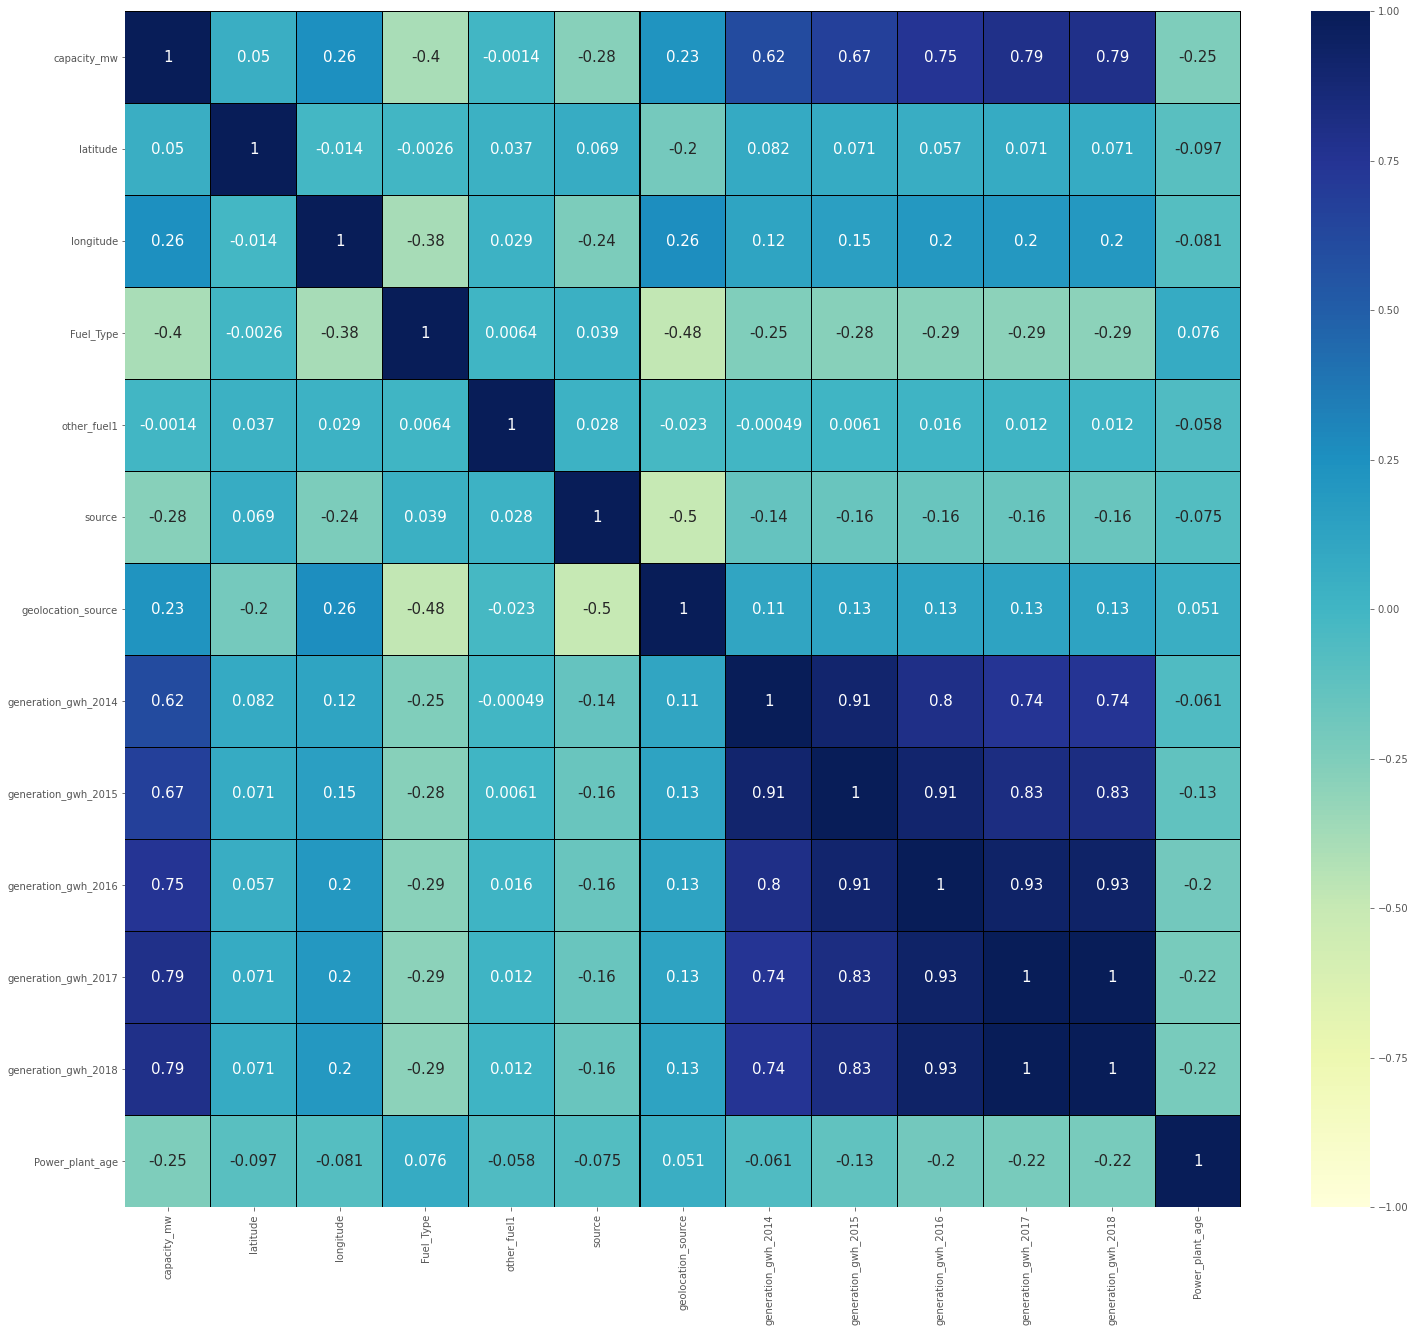

In [280]:
plt.figure(figsize=(25,22))
sns.heatmap(new_df.corr(),linewidths=.1,vmin=-1, vmax=1, fmt='.2g', annot = True, linecolor="black",annot_kws={'size':15},cmap="YlGnBu")
plt.yticks(rotation=0)

In [ ]:
Here we can see the co-relation between all the features and the features and targets

The label capacity_mw is highly positively correlated with the features generation_gwh_2017, generation_gwh_2016, generation_gwh_2015, generation_gwh_2014. 
And the label is negatively correlated with the features Fuel_Type, source and Power_plant_age. The columns other_fuel1 and latitude have no relation with the label, so we can drop them.

The label Fuel_Type is less correlated with Power_plant_age and source. The label is negatively correlated with geolocation_source, longitude, capacity_mw, and all generation_gwh years.

From the heat map we can notice most of the features are highly correlated with each other which leads to multicollinearity problem. So will try to solve this problem by Checking VIF value before building our models.

Also the features other_fuel1 and latitude have very very less correlation with both the labels. Let's drop those columns.

### Visualizing the correlation between label and features using bar plot

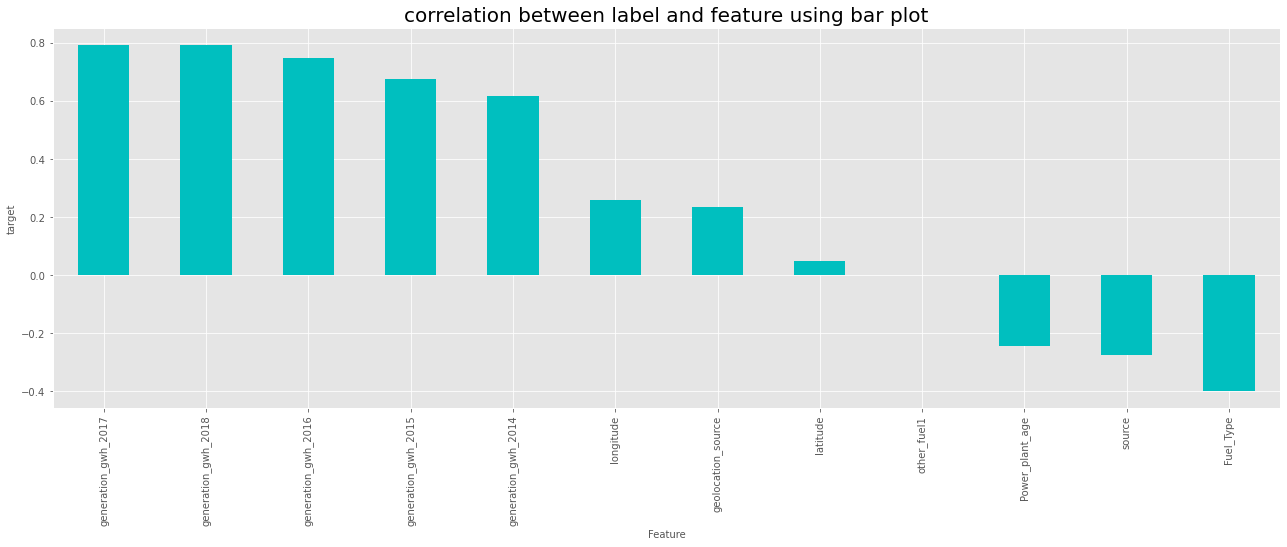

In [281]:
plt.figure(figsize=(22,7))
new_df.corr()['capacity_mw'].sort_values(ascending=False).drop(['capacity_mw']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=10)
plt.ylabel('target',fontsize=10)
plt.title('correlation between label and feature using bar plot',fontsize=20)
plt.show()

## Visualizing the correlation between label and features using bar plot

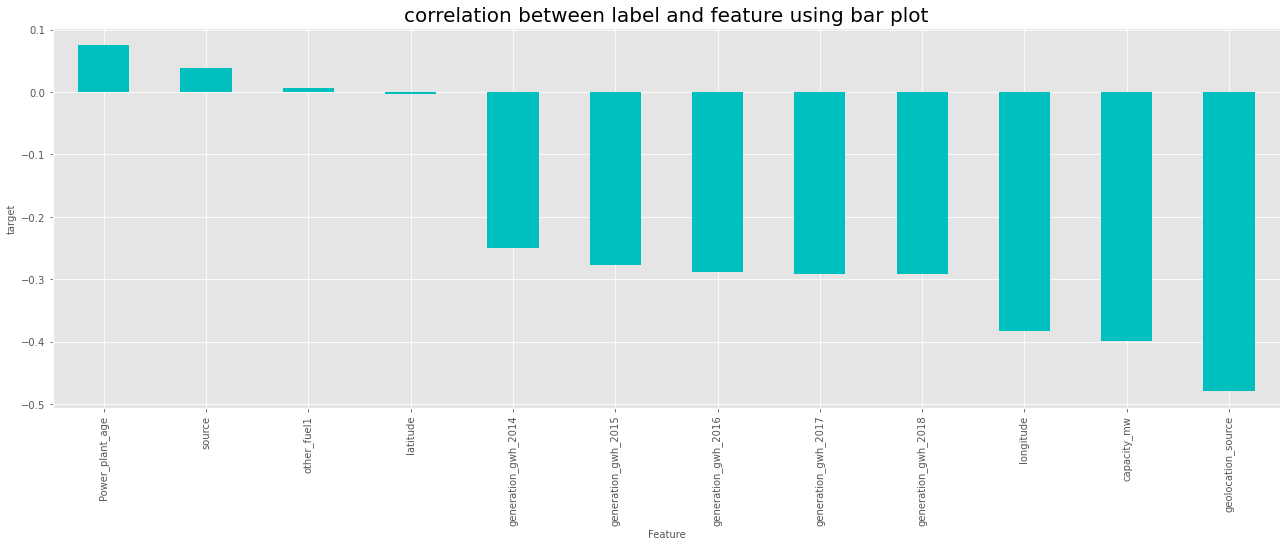

In [282]:
plt.figure(figsize=(22,7))
new_df.corr()['Fuel_Type'].sort_values(ascending=False).drop(['Fuel_Type']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=10)
plt.ylabel('target',fontsize=10)
plt.title('correlation between label and feature using bar plot',fontsize=20)
plt.show()

## Feature selection by dropping irrelevant features

In [283]:
new_df.drop("other_fuel1",axis=1,inplace=True)
new_df.drop("latitude",axis=1,inplace=True)

In [284]:
new_df.head()

,capacity_mw,longitude,Fuel_Type,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Power_plant_age
0,2.5,73.2407,6,109,1,801.123775,711.181225,737.205450,817.977250,817.977250,7.0
1,98.0,74.6090,1,174,2,801.123775,711.181225,737.205450,817.977250,817.977250,17.0
2,39.2,69.3732,7,21,2,801.123775,711.181225,737.205450,817.977250,817.977250,17.0
3,135.0,91.3602,2,22,2,617.789264,843.747000,886.004428,663.774500,663.774500,14.0
4,1800.0,82.4091,1,22,2,3035.550000,5916.370000,6243.000000,5385.579736,5385.579736,3.0


# PREDICTION

## 1. Capacity_mw

### Seperating the features and target variable

In [285]:
x=new_df.drop('capacity_mw', axis=1)
y=new_df["capacity_mw"]

In [286]:
x.shape

(852, 10)

In [287]:
y.shape

(852,)

### Checking for skewness

In [288]:
x.skew().sort_values()

geolocation_source    -2.068499
Fuel_Type              0.415658
longitude              0.944167
Power_plant_age        1.279935
source                 1.736117
generation_gwh_2017    2.531497
generation_gwh_2018    2.531497
generation_gwh_2016    2.634502
generation_gwh_2015    2.714849
generation_gwh_2014    2.941090
dtype: float64

The following columns have skewness more than +0.5 and -0.5.

longitude generation_gwh_2013 generation_gwh_2014 generation_gwh_2015 generation_gwh_2016 generation_gwh_2017 Power_plant_age

### Removing skewness using yeo-johnson method

In [289]:
skew = ['longitude','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','generation_gwh_2018','Power_plant_age']
scaler = PowerTransformer(method='yeo-johnson')
'''
parameters:
method = 'box-cox' or 'yeo-johnson'
'''

"\nparameters:\nmethod = 'box-cox' or 'yeo-johnson'\n"

In [290]:
x[skew] = scaler.fit_transform(x[skew].values)
x[skew].head()

,longitude,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Power_plant_age
0,-0.923108,-0.045344,-0.050236,-0.047960,-0.037222,-0.037222,-1.078648
1,-0.500996,-0.045344,-0.050236,-0.047960,-0.037222,-0.037222,0.048221
2,-2.377958,-0.045344,-0.050236,-0.047960,-0.037222,-0.037222,0.048221
3,2.432300,-0.270221,0.092725,0.103688,-0.201197,-0.201197,-0.243520
4,1.261687,1.425934,2.286967,2.272564,1.972624,1.972624,-1.755558


In [291]:
x.skew()

longitude             -0.000209
Fuel_Type              0.415658
source                 1.736117
geolocation_source    -2.068499
generation_gwh_2014    0.231858
generation_gwh_2015    0.163407
generation_gwh_2016    0.145702
generation_gwh_2017    0.126375
generation_gwh_2018    0.126375
Power_plant_age        0.042667
dtype: float64

The skewness has been removed now

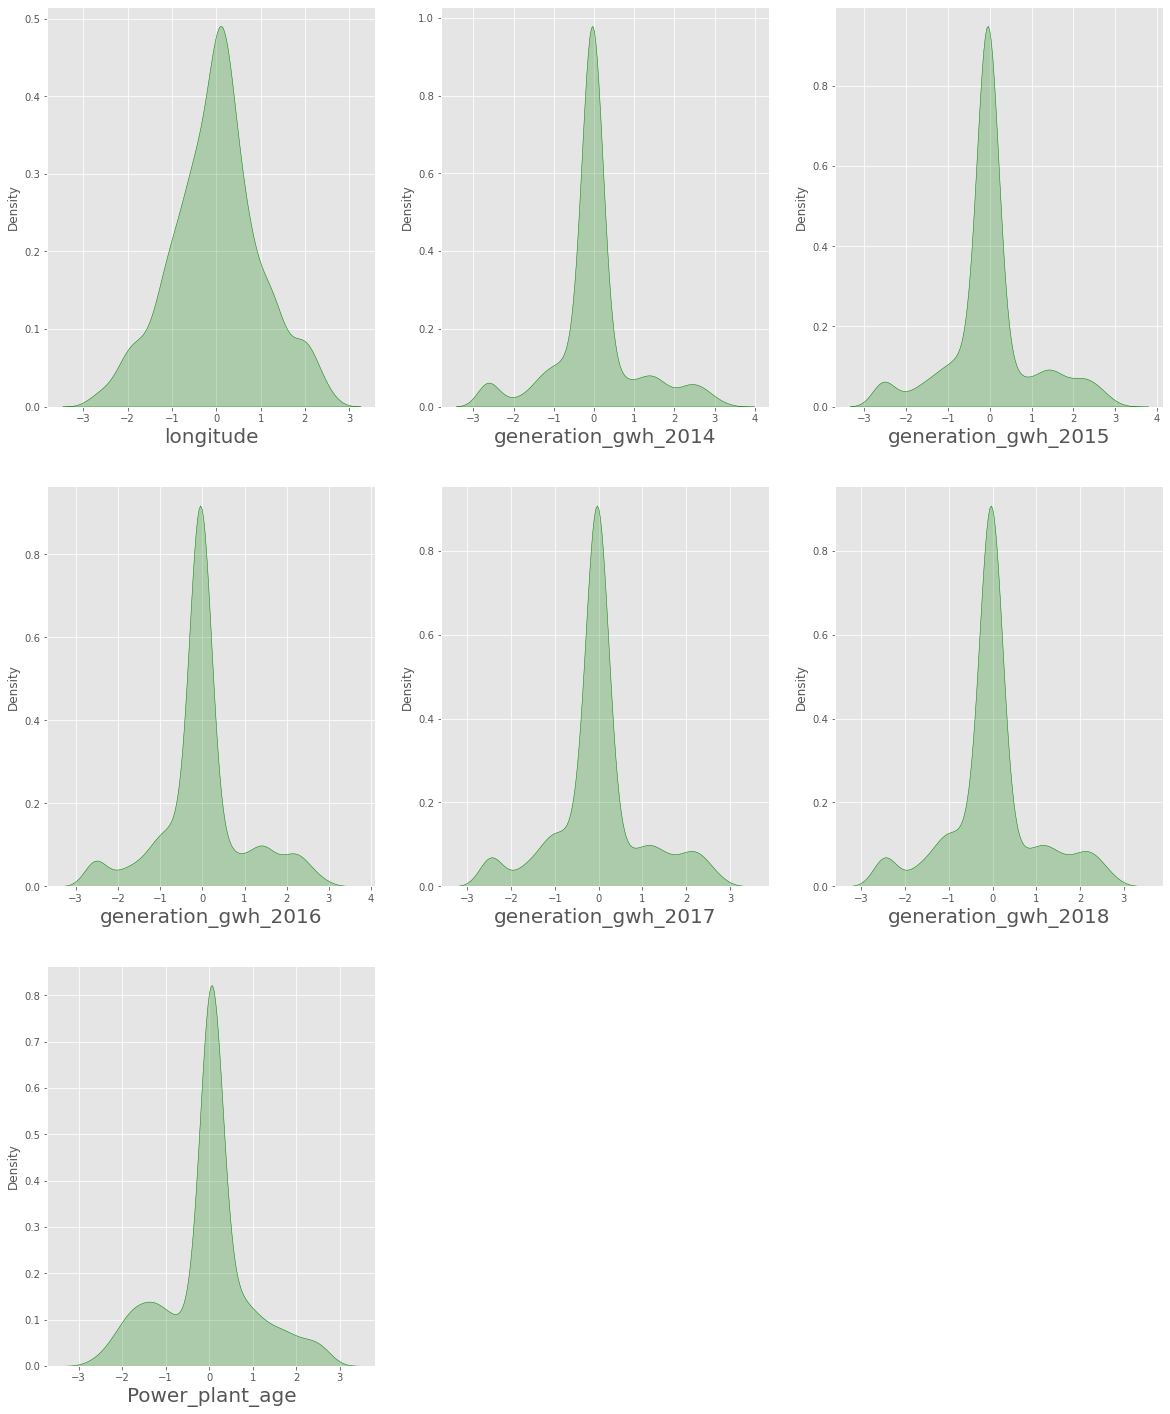

In [292]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in x[skew]:
    if plotnumber<=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(x[column],color='g',kde_kws={"shade": True},hist=False)
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

The dataset looks normal now

## Feature Scalling

In [293]:
#Scalling the data using Standard Scaler
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x

,longitude,Fuel_Type,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Power_plant_age
0,-0.923108,1.176685,1.399156,-1.037509,-0.045344,-0.050236,-0.047960,-0.037222,-0.037222,-1.078648
1,-0.500996,-0.974679,2.823623,0.406866,-0.045344,-0.050236,-0.047960,-0.037222,-0.037222,0.048221
2,-2.377958,1.606958,-0.529352,0.406866,-0.045344,-0.050236,-0.047960,-0.037222,-0.037222,0.048221
3,2.432300,-0.544406,-0.507437,0.406866,-0.270221,0.092725,0.103688,-0.201197,-0.201197,-0.243520
4,1.261687,-0.974679,-0.507437,0.406866,1.425934,2.286967,2.272564,1.972624,1.972624,-1.755558
...,...,...,...,...,...,...,...,...,...,...
847,0.230878,-0.974679,-0.507437,0.406866,-0.045344,-2.461735,-0.843361,0.008697,0.008697,-1.978203
848,0.420621,1.176685,0.697881,-2.481884,-0.045344,-0.050236,-0.047960,-0.037222,-0.037222,0.048221
849,-0.225562,1.606958,-0.529352,0.406866,-0.045344,-0.050236,-0.047960,-0.037222,-0.037222,0.048221
850,-0.761758,-0.974679,0.303413,0.406866,-0.045344,-0.050236,-0.047960,-0.037222,-0.037222,0.048221


Dataset x is now scaled

### Checking Multi-colinearity

In [294]:
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i)
              for i in range(len(x.columns))]
vif["Features"] = x.columns

# Let's check the values
vif

,VIF values,Features
0,1.308042,longitude
1,1.683092,Fuel_Type
2,1.503056,source
3,1.875721,geolocation_source
4,3.592983,generation_gwh_2014
5,6.181058,generation_gwh_2015
6,9.584370,generation_gwh_2016
7,inf,generation_gwh_2017
8,inf,generation_gwh_2018
9,1.102771,Power_plant_age


VIF values in all the columns are less then 10, hence no multicolinearity problem exists.

### MODELLING FOR CAPACITY_MW

In [295]:
#gettig the best random state
maxAccu=0
maxRS=0
for i in range(1,100): 
    x_train,x_test, y_train, y_test =train_test_split(x,y, test_size=.30,random_state=i)
    mod=RandomForestRegressor()
    mod.fit(x_train, y_train)
    pred=mod.predict(x_test)
    acc=r2_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('R2 Score=', maxAccu, 'Random_State',maxRS)

R2 Score= 0.8521909566056537 Random_State 11


We got r2 score of 85% at a random state of 85

#### Train_test_Split

In [296]:
x_train,x_test, y_train, y_test=train_test_split(x,y,test_size=.30, random_state=maxRS)

### Linear Regression

In [297]:
# Checking r2score for Linear Regression
LR = LinearRegression()
LR.fit(x_train,y_train)

# prediction
predLR=LR.predict(x_test)
print('R2_score:',r2_score(y_test,predLR))

# Mean Absolute Error (MAE)
print('MAE:',metrics.mean_absolute_error(y_test, predLR))

# Mean Squared Error (MSE)
print('MSE:',metrics.mean_squared_error(y_test, predLR))

# Root Mean Squared Error (RMSE)
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, predLR)))

R2_score: 0.6293577318402896
MAE: 193.2137728960165
MSE: 76217.99148047285
RMSE: 276.0760610420122


Getting an accuracy score of 62%

### Random Forest Regressor

In [298]:
rf=RandomForestRegressor()
rf.fit(x_train, y_train)

# prediction
predrf=rf.predict(x_test)
print('R2_score:',r2_score(y_test,predrf))

# Mean Absolute Error (MAE)
print('MAE:',metrics.mean_absolute_error(y_test, predrf))

# Mean Squared Error (MSE)
print('MSE:',metrics.mean_squared_error(y_test, predrf))

# Root Mean Squared Error (RMSE)
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, predrf)))

R2_score: 0.8327378614382777
MAE: 95.98299484337616
MSE: 34395.38699997842
RMSE: 185.45993367835118


Accuracy score is 83%

### Gradient Boosting Regressor

In [308]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import scipy as stats
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from scipy.stats import zscore
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.ensemble import GradientBoostingClassifier, BaggingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score

In [309]:
gb=GradientBoostingRegressor()
gb.fit(x_train,y_train)

predgb=gb.predict(x_test)
print('R2_Score:',r2_score(y_test,predgb))

# Mean Absolute Error (MAE)
print('MAE:',metrics.mean_absolute_error(y_test, predgb))

# Mean Squared Error (MSE)
print('MSE:',metrics.mean_squared_error(y_test, predgb))

# Root Mean Squared Error (RMSE)
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, predgb)))

R2_Score: 0.836624253584707
MAE: 100.26068042161003
MSE: 33596.198593925685
RMSE: 183.29265831976383


Accuracy score is 83%

### Bagging Regressor

In [310]:
br=BaggingRegressor()
br.fit(x_train,y_train)

predbr=br.predict(x_test)
print('R2_Score:',r2_score(y_test,predbr))

# Mean Absolute Error (MAE)
print('MAE:',metrics.mean_absolute_error(y_test, predbr))

# Mean Squared Error (MSE)
print('MSE:',metrics.mean_squared_error(y_test, predbr))

# Root Mean Squared Error (RMSE)
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, predbr)))

R2_Score: 0.8279878515561172
MAE: 98.55298839285715
MSE: 35372.16769616892
RMSE: 188.0748991656487


Accuracy score is 82%

#### Cross- Validation

In [312]:
# Checking cv score for Linear Regression
print(cross_val_score(LR,x,y,cv=5).mean())

# Checking cv score for Random Forest Regressor
print(cross_val_score(rf,x,y,cv=5).mean())

#Checking the cv score for GradientBoostingRegressor
print(cross_val_score(gb,x,y,cv=5).mean())

#Checking the cv score for BaggingRegressor
print(cross_val_score(br,x,y,cv=5).mean())

0.5405281296631363
0.7572735563248222
0.7359914888286434
0.7359433707041241


From the above observation, the difference between R2 score and the cross validation score we conclude that Random Forest Regressor as our best fitting model. Let's increse the accuracy of the model by usiing hyper parameter tuning.

### Hyper Parameter Tuning for the model with best acc and cv score

In [313]:
#RandomForestRegressor
parameters = {'criterion':['mse', 'mae'],
             'max_features':['auto', 'sqrt', 'log2'],
             'n_estimators':[0,200],
             'max_depth':[2,3,4,6]}

In [314]:
GCV=GridSearchCV(RandomForestRegressor(),parameters,cv=5)

In [315]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'criterion': ['mse', 'mae'], 'max_depth': [2, 3, 4, 6],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [0, 200]})

In [316]:
GCV.best_params_

{'criterion': 'mae',
 'max_depth': 6,
 'max_features': 'sqrt',
 'n_estimators': 200}

These are the best parameters for the RandomForestRegressor

In [317]:
capacity_mw = RandomForestRegressor(criterion='mse', max_depth=6, max_features='log2', n_estimators=200)
capacity_mw.fit(x_train, y_train)
pred = capacity_mw.predict(x_test)
print('R2_Score:',r2_score(y_test,pred)*100)
print("RMSE value:",np.sqrt(metrics.mean_squared_error(y_test, predrf)))

R2_Score: 85.30156524297303
RMSE value: 185.45993367835118


After HyperParameter Tuning, we are getting an accuracy score of 85%

# Saving the model

In [318]:
import joblib
joblib.dump(capacity_mw,"Global_Power_Plant_capacity_mw.pkl")

['Global_Power_Plant_capacity_mw.pkl']

# 2. Fuel_Type (Prediction)

### Seperating the Dataset into Features and Label(Fuel_Type)

In [319]:
x_df = new_df.drop("Fuel_Type", axis=1)
y_df = new_df["Fuel_Type"]

In [320]:
x_df.shape

(852, 10)

In [321]:
y_df.shape

(852,)

### Checking the Skewness of x_df

In [322]:
x_df.skew().sort_values()

geolocation_source    -2.068499
longitude              0.944167
Power_plant_age        1.279935
source                 1.736117
capacity_mw            2.185823
generation_gwh_2017    2.531497
generation_gwh_2018    2.531497
generation_gwh_2016    2.634502
generation_gwh_2015    2.714849
generation_gwh_2014    2.941090
dtype: float64

We can see that there are skewness in most of the columns

### Removing the skewness

In [325]:
skew = ['capacity_mw','longitude','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','generation_gwh_2018','Power_plant_age']

from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')
'''
parameters:
method = 'box-cox' or 'yeo-johnson'
'''

"\nparameters:\nmethod = 'box-cox' or 'yeo-johnson'\n"

In [326]:
x_df[skew] = scaler.fit_transform(x_df[skew].values)
x_df[skew].head()

,capacity_mw,longitude,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Power_plant_age
0,-1.677574,-0.923108,-0.045344,-0.050236,-0.047960,-0.037222,-0.037222,-1.078648
1,0.218008,-0.500996,-0.045344,-0.050236,-0.047960,-0.037222,-0.037222,0.048221
2,-0.275959,-2.377958,-0.045344,-0.050236,-0.047960,-0.037222,-0.037222,0.048221
3,0.389127,2.432300,-0.270221,0.092725,0.103688,-0.201197,-0.201197,-0.243520
4,1.726747,1.261687,1.425934,2.286967,2.272564,1.972624,1.972624,-1.755558


In [327]:
x_df.skew().sort_values()

geolocation_source    -2.068499
longitude             -0.000209
capacity_mw            0.016478
Power_plant_age        0.042667
generation_gwh_2017    0.126375
generation_gwh_2018    0.126375
generation_gwh_2016    0.145702
generation_gwh_2015    0.163407
generation_gwh_2014    0.231858
source                 1.736117
dtype: float64

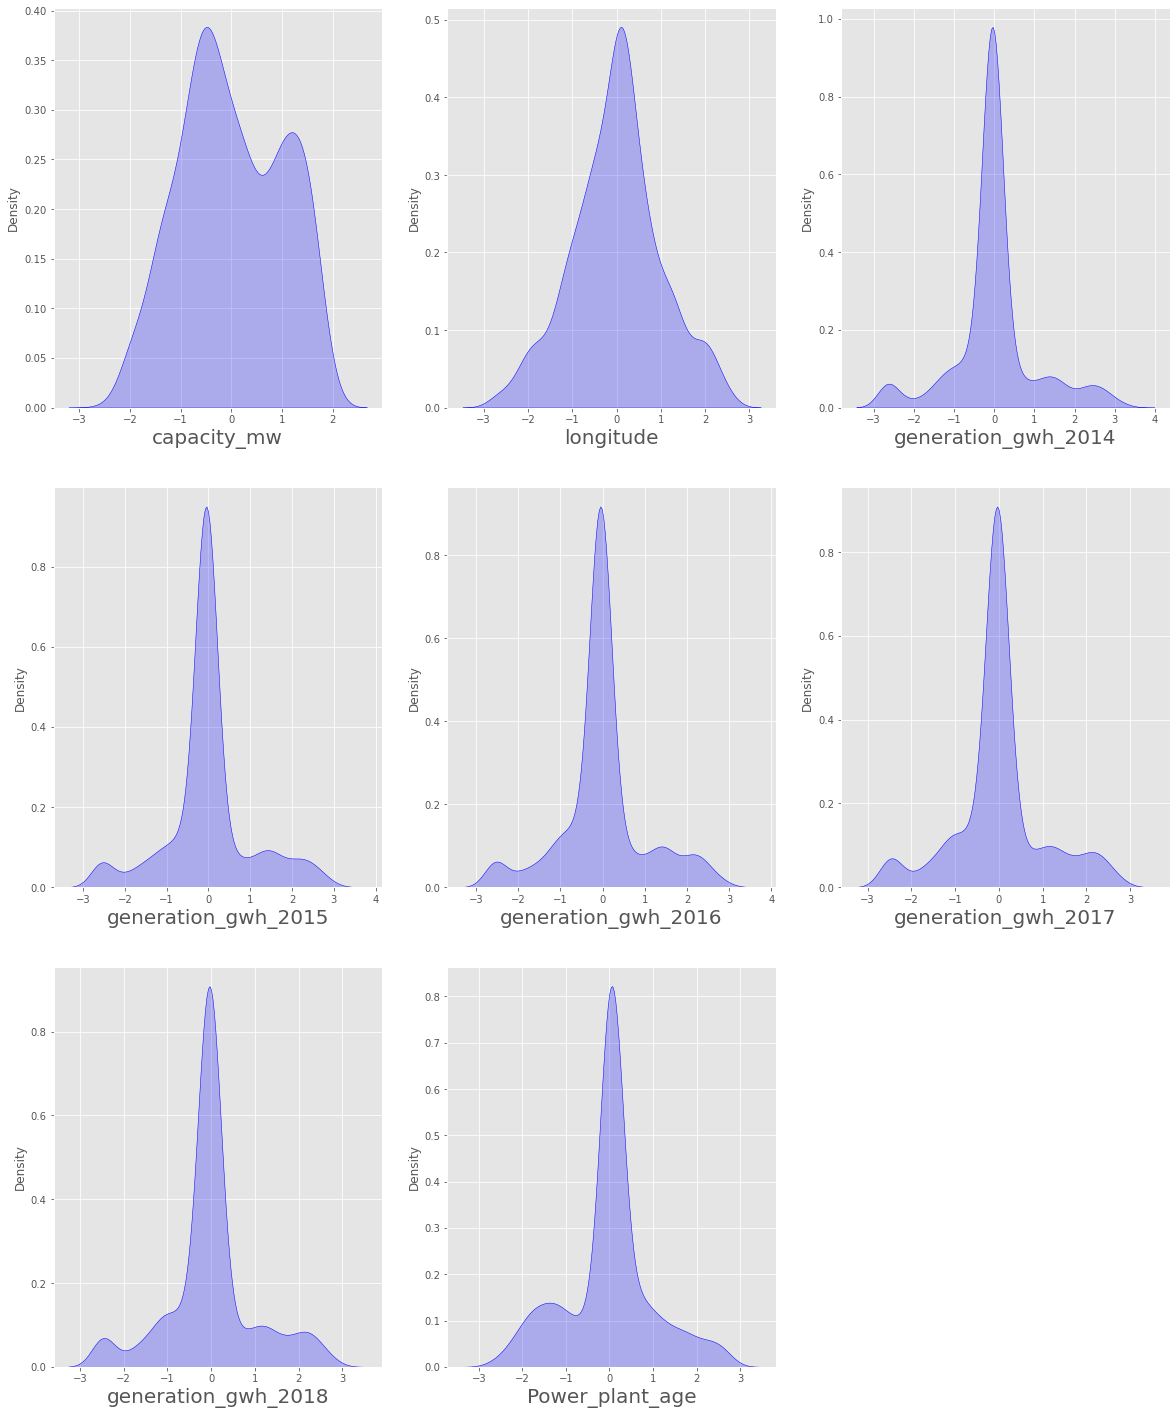

In [328]:
#Lets visualize the data

plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in x_df[skew]:
    if plotnumber<=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(x_df[column],color='b',kde_kws={"shade": True},hist=False)
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

The dataset looks normally distributed now

### Feature Scalling

In [329]:
scaler=StandardScaler()
x_df=pd.DataFrame(scaler.fit_transform(x_df),columns=x_df.columns)
x_df

,capacity_mw,longitude,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Power_plant_age
0,-1.677574,-0.923108,1.399156,-1.037509,-0.045344,-0.050236,-0.047960,-0.037222,-0.037222,-1.078648
1,0.218008,-0.500996,2.823623,0.406866,-0.045344,-0.050236,-0.047960,-0.037222,-0.037222,0.048221
2,-0.275959,-2.377958,-0.529352,0.406866,-0.045344,-0.050236,-0.047960,-0.037222,-0.037222,0.048221
3,0.389127,2.432300,-0.507437,0.406866,-0.270221,0.092725,0.103688,-0.201197,-0.201197,-0.243520
4,1.726747,1.261687,-0.507437,0.406866,1.425934,2.286967,2.272564,1.972624,1.972624,-1.755558
...,...,...,...,...,...,...,...,...,...,...
847,1.667859,0.230878,-0.507437,0.406866,-0.045344,-2.461735,-0.843361,0.008697,0.008697,-1.978203
848,-1.598427,0.420621,0.697881,-2.481884,-0.045344,-0.050236,-0.047960,-0.037222,-0.037222,0.048221
849,-0.508566,-0.225562,-0.529352,0.406866,-0.045344,-0.050236,-0.047960,-0.037222,-0.037222,0.048221
850,0.109088,-0.761758,0.303413,0.406866,-0.045344,-0.050236,-0.047960,-0.037222,-0.037222,0.048221


Dataset has been scaled

### Checking Multicolinearity

In [330]:
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x_df.values,i)
              for i in range(len(x_df.columns))]
vif["Features"] = x_df.columns

# Let's check the values
vif

,VIF values,Features
0,1.814038,capacity_mw
1,1.191632,longitude
2,1.413362,source
3,1.590733,geolocation_source
4,3.612645,generation_gwh_2014
5,6.189020,generation_gwh_2015
6,9.585277,generation_gwh_2016
7,inf,generation_gwh_2017
8,inf,generation_gwh_2018
9,1.155133,Power_plant_age


We have seen that all the columns has vif values less then 10, hence there is no multicolinearity that exist.

In [331]:
y_df.value_counts()

1    239
3    220
6    126
7    123
2     65
0     50
5     20
4      9
Name: Fuel_Type, dtype: int64

We can see that the targer Fuel_Type has multiple classes in the mode of energy source, hence we can see that this is a multi classification problem. As the data between the classes are not balance with 1 having 240 counys and 4 having only 9 counts, we have to do oversampling of the data.

### OverSampling

In [332]:
from imblearn.over_sampling import SMOTE
sm = SMOTE()
x_df, y_df = sm.fit_resample(x_df,y_df)

In [333]:
y_df.value_counts()

0    239
1    239
2    239
3    239
4    239
5    239
6    239
7    239
Name: Fuel_Type, dtype: int64

Here we can see that the data imbalance has been removed.

In [334]:
x_df.head()

,capacity_mw,longitude,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Power_plant_age
0,-1.677574,-0.923108,1.399156,-1.037509,-0.045344,-0.050236,-0.047960,-0.037222,-0.037222,-1.078648
1,0.218008,-0.500996,2.823623,0.406866,-0.045344,-0.050236,-0.047960,-0.037222,-0.037222,0.048221
2,-0.275959,-2.377958,-0.529352,0.406866,-0.045344,-0.050236,-0.047960,-0.037222,-0.037222,0.048221
3,0.389127,2.432300,-0.507437,0.406866,-0.270221,0.092725,0.103688,-0.201197,-0.201197,-0.243520
4,1.726747,1.261687,-0.507437,0.406866,1.425934,2.286967,2.272564,1.972624,1.972624,-1.755558


## Modelling

### Getting the best random state

In [335]:
maxAccu=0
maxRS=0

for i in range(1,200):
    x_df_train,x_df_test, y_df_train, y_df_test=train_test_split(x_df,y_df,test_size=.30, random_state=i)
    rfc=RandomForestClassifier()
    rfc.fit(x_df_train,y_df_train)
    pred=rfc.predict(x_df_test)
    acc=accuracy_score(y_df_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu," on Random_state ",maxRS) 

Best accuracy is  0.9320557491289199  on Random_state  6


We got an accuracy score of 93% with a RandomState of 149

### Creating train_test_split

In [336]:
x_df_train,x_df_test,y_df_train,y_df_test=train_test_split(x_df,y_df,test_size=.30,random_state=maxRS)

We have created the train_test_split based on the masRS

### 1.Logistic Regression

In [337]:
# Checking Accuracy for Logistic Regression
log = LogisticRegression()
log.fit(x_df_train,y_df_train)

#Prediction
predlog = log.predict(x_df_test)

print(accuracy_score(y_df_test, predlog))
print(confusion_matrix(y_df_test, predlog))
print(classification_report(y_df_test,predlog))

0.6515679442508711
[[59  0  0  0  0  1  0  7]
 [12 31 13  5 19  1  0  2]
 [ 2  9 27 11  8 12  0  1]
 [ 0 10  8 29  4  5  0 12]
 [ 0  7  7  7 58  0  0  0]
 [ 8  3  6  1  3 44  0  4]
 [ 0  1  0  0  0  0 67  0]
 [ 0  0  0 11  0  0  0 59]]
              precision    recall  f1-score   support

           0       0.73      0.88      0.80        67
           1       0.51      0.37      0.43        83
           2       0.44      0.39      0.41        70
           3       0.45      0.43      0.44        68
           4       0.63      0.73      0.68        79
           5       0.70      0.64      0.67        69
           6       1.00      0.99      0.99        68
           7       0.69      0.84      0.76        70

    accuracy                           0.65       574
   macro avg       0.64      0.66      0.65       574
weighted avg       0.64      0.65      0.64       574



The accuracy score for Logistic Regression is 65%

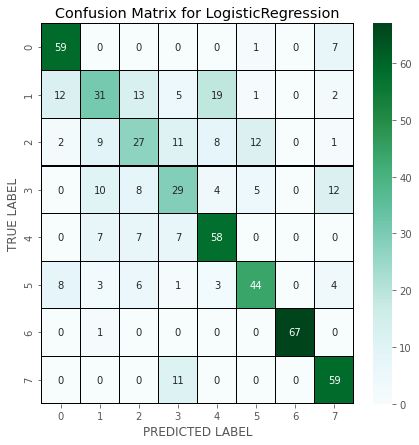

In [338]:
# Plotting Confusion_Matrix
cm = confusion_matrix(y_df_test,predlog)

x_axis_labels = ["0","1","2","3","4","5","6","7"]
y_axis_labels = ["0","1","2","3","4","5","6","7"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="BuGn",xticklabels=x_axis_labels,yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for LogisticRegression')
plt.show()

### 2.Random Forest Classifier

In [339]:
# Checking accuracy for Random Forest Classifier
rf = RandomForestClassifier()
rf.fit(x_df_train,y_df_train)

# Prediction
predrf = rf.predict(x_df_test)

print(accuracy_score(y_df_test, predrf))
print(confusion_matrix(y_df_test, predrf))
print(classification_report(y_df_test,predrf))

0.9181184668989547
[[64  0  1  0  0  1  0  1]
 [ 7 60  5  2  5  4  0  0]
 [ 0  3 64  1  0  2  0  0]
 [ 0  6  7 54  0  1  0  0]
 [ 0  0  0  0 79  0  0  0]
 [ 0  1  0  0  0 68  0  0]
 [ 0  0  0  0  0  0 68  0]
 [ 0  0  0  0  0  0  0 70]]
              precision    recall  f1-score   support

           0       0.90      0.96      0.93        67
           1       0.86      0.72      0.78        83
           2       0.83      0.91      0.87        70
           3       0.95      0.79      0.86        68
           4       0.94      1.00      0.97        79
           5       0.89      0.99      0.94        69
           6       1.00      1.00      1.00        68
           7       0.99      1.00      0.99        70

    accuracy                           0.92       574
   macro avg       0.92      0.92      0.92       574
weighted avg       0.92      0.92      0.92       574



Accuracy is 91.8%

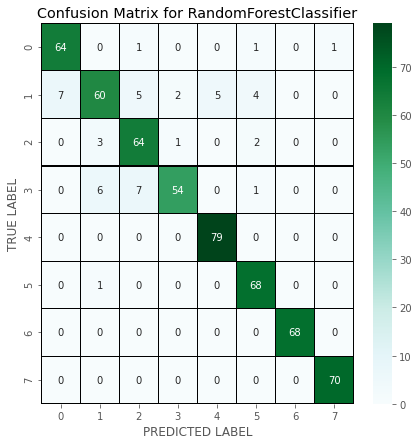

In [340]:
# Lets plot confusion matrix for RandomForestClassifier
cm = confusion_matrix(y_df_test,predrf)

x_axis_labels = ["0","1","2","3","4","5","6","7"]
y_axis_labels = ["0","1","2","3","4","5","6","7"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="BuGn",xticklabels=x_axis_labels,yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for RandomForestClassifier')
plt.show()

### 3.Decission Tree Classifier

In [341]:
# Checking Accuracy for Decision Tree Classifier
dtc = DecisionTreeClassifier()
dtc.fit(x_df_train,y_df_train)

#Prediction
preddtc = dtc.predict(x_df_test)

print(accuracy_score(y_df_test, preddtc))
print(confusion_matrix(y_df_test, preddtc))
print(classification_report(y_df_test,preddtc))

0.872822299651568
[[65  1  1  0  0  0  0  0]
 [ 9 59  4  3  5  3  0  0]
 [ 0  6 55  4  1  4  0  0]
 [ 0  9  6 47  3  3  0  0]
 [ 0  4  0  2 73  0  0  0]
 [ 0  3  2  0  0 64  0  0]
 [ 0  0  0  0  0  0 68  0]
 [ 0  0  0  0  0  0  0 70]]
              precision    recall  f1-score   support

           0       0.88      0.97      0.92        67
           1       0.72      0.71      0.72        83
           2       0.81      0.79      0.80        70
           3       0.84      0.69      0.76        68
           4       0.89      0.92      0.91        79
           5       0.86      0.93      0.90        69
           6       1.00      1.00      1.00        68
           7       1.00      1.00      1.00        70

    accuracy                           0.87       574
   macro avg       0.88      0.88      0.87       574
weighted avg       0.87      0.87      0.87       574



Accuracy is 87%

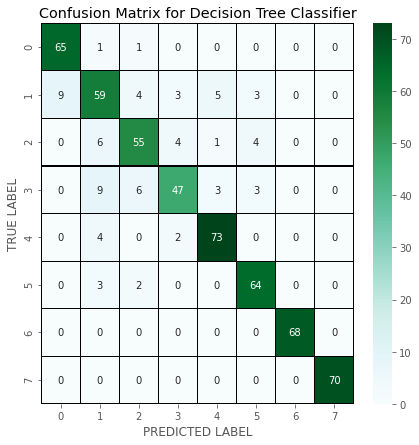

In [342]:
# Lets plot confusion matrix for DTC
cm = confusion_matrix(y_df_test,preddtc)

x_axis_labels = ["0","1","2","3","4","5","6","7"]
y_axis_labels = ["0","1","2","3","4","5","6","7"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="BuGn",xticklabels=x_axis_labels,yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Decision Tree Classifier')
plt.show()

### 4.Support Vector Machine Classifier

In [343]:
# Checking accuracy for Support Vector Machine Classifier
svc = SVC()
svc.fit(x_df_train,y_df_train)

# Prediction
predsvc = svc.predict(x_df_test)

print(accuracy_score(y_df_test, predsvc))
print(confusion_matrix(y_df_test, predsvc))
print(classification_report(y_df_test,predsvc))

0.794425087108014
[[59  0  0  0  0  1  0  7]
 [13 44  4  1 10  5  0  6]
 [ 1  6 44  2  2 12  0  3]
 [ 0 10 12 35  2  1  0  8]
 [ 0  0  3  0 76  0  0  0]
 [ 1  3  0  0  0 61  0  4]
 [ 0  0  0  0  0  0 68  0]
 [ 0  0  1  0  0  0  0 69]]
              precision    recall  f1-score   support

           0       0.80      0.88      0.84        67
           1       0.70      0.53      0.60        83
           2       0.69      0.63      0.66        70
           3       0.92      0.51      0.66        68
           4       0.84      0.96      0.90        79
           5       0.76      0.88      0.82        69
           6       1.00      1.00      1.00        68
           7       0.71      0.99      0.83        70

    accuracy                           0.79       574
   macro avg       0.80      0.80      0.79       574
weighted avg       0.80      0.79      0.78       574



Accuracy is 79%

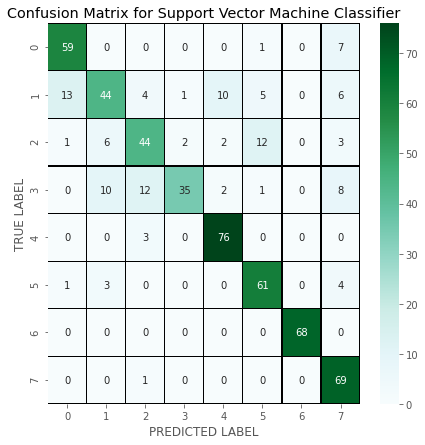

In [344]:
# Lets plot confusion matrix for Support Vector Machine Classifier
cm = confusion_matrix(y_df_test,predsvc)

x_axis_labels = ["0","1","2","3","4","5","6","7"]
y_axis_labels = ["0","1","2","3","4","5","6","7"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="BuGn",xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Support Vector Machine Classifier')
plt.show()

### 5.Gradient Boosting Classifier

In [345]:
# Checking accuracy for Gradient Boosting Classifier
GB = GradientBoostingClassifier()
GB.fit(x_df_train,y_df_train)

# Prediction
predGB = GB.predict(x_df_test)

print(accuracy_score(y_df_test, predGB))
print(confusion_matrix(y_df_test, predGB))
print(classification_report(y_df_test,predGB))

0.9128919860627178
[[64  1  0  0  0  2  0  0]
 [ 5 64  6  2  2  4  0  0]
 [ 0  3 61  4  0  2  0  0]
 [ 0  4  9 53  1  1  0  0]
 [ 0  0  0  0 79  0  0  0]
 [ 0  1  3  0  0 65  0  0]
 [ 0  0  0  0  0  0 68  0]
 [ 0  0  0  0  0  0  0 70]]
              precision    recall  f1-score   support

           0       0.93      0.96      0.94        67
           1       0.88      0.77      0.82        83
           2       0.77      0.87      0.82        70
           3       0.90      0.78      0.83        68
           4       0.96      1.00      0.98        79
           5       0.88      0.94      0.91        69
           6       1.00      1.00      1.00        68
           7       1.00      1.00      1.00        70

    accuracy                           0.91       574
   macro avg       0.91      0.91      0.91       574
weighted avg       0.91      0.91      0.91       574



Accuracy is 91.2%

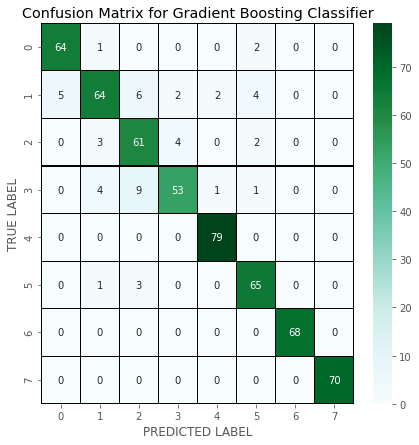

In [346]:
# Lets plot confusion matrix for Gradient Boosting Classifier
cm = confusion_matrix(y_df_test,predGB)

x_axis_labels = ["0","1","2","3","4","5","6","7"]
y_axis_labels = ["0","1","2","3","4","5","6","7"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="BuGn",xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Gradient Boosting Classifier')
plt.show()

### Cross_Validation_Score

In [347]:
#cv score for Logistic Regression
print(cross_val_score(log,x_df,y_df,cv=5).mean())

# cv score for Decision Tree Classifier
print(cross_val_score(dtc,x_df,y_df,cv=5).mean())

# cv score for Random Forest Classifier
print(cross_val_score(rf,x_df,y_df,cv=5).mean())

# cv score for Support Vector  Classifier
print(cross_val_score(svc,x_df,y_df,cv=5).mean())

# cv score for Gradient Boosting Classifier
print(cross_val_score(GB,x_df,y_df,cv=5).mean())

0.6961218268560414
0.8624677046737659
0.9090112503930119
0.8007409128812215
0.8969775675638729


From the accuracy score and cross validation we can see that Random Forest Classifier is the best model.

### HyperParameter Tuning for the model with best score

In [348]:
#Random Forest Classifier

parameters = {'criterion':['gini'],
             'max_features':['auto'],
             'n_estimators':[0,200],
             'max_depth':[2,3,4,5,6,8]}

In [349]:
GCV=GridSearchCV(RandomForestClassifier(),parameters,cv=5)

In [350]:
GCV.fit(x_df_train,y_df_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini'], 'max_depth': [2, 3, 4, 5, 6, 8],
                         'max_features': ['auto'], 'n_estimators': [0, 200]})

In [351]:
GCV.best_params_

{'criterion': 'gini',
 'max_depth': 8,
 'max_features': 'auto',
 'n_estimators': 200}

These are the best parameters

In [352]:
fuel_type =RandomForestClassifier (criterion='gini', max_depth=8, max_features='auto', n_estimators=200)
fuel_type.fit(x_df_train, y_df_train)
pred = fuel_type.predict(x_df_test)
acc=accuracy_score(y_df_test,pred)
print(acc*100)

88.32752613240417


After HyperParameter tuning we have received an accuracy score of 88%

### Plotting ROC and compare AUC for the final model

In [353]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier

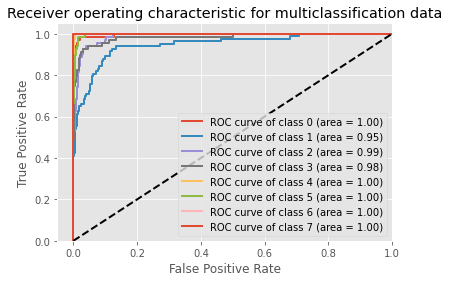

In [354]:
classifier = OneVsRestClassifier(fuel_type)
y_score = classifier.fit(x_df_train, y_df_train).predict_proba(x_df_test)

#Binarize the output
y_df_test_bin  = label_binarize(y_df_test, classes=[0,1,2,3,4,5,6,7])
n_classes = 8

# Compute ROC curve and AUC for all the classes
false_positive_rate = dict()
true_positive_rate = dict()
roc_auc = dict()
for i in range(n_classes):
    false_positive_rate[i], true_positive_rate[i], _ = roc_curve(y_df_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(false_positive_rate[i], true_positive_rate[i])
    
   
for i in range(n_classes):
    plt.plot(false_positive_rate[i], true_positive_rate[i], lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multiclassification data')
plt.legend(loc="lower right")
plt.show()

### Saving the model

In [355]:
import joblib
joblib.dump(fuel_type,"Global_Power_Plant_Fuel_Type.pkl")

['Global_Power_Plant_Fuel_Type.pkl']

In [ ]:
Conclusion:
The accuracy score for Fuel_Type is 88%
The accuracy score for capacity_mw is 85%